In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('Classified Data')
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


To remove the unnamed column we use index_col=0

In [6]:
df = pd.read_csv('Classified Data',index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Standardize the variables:
Because the KNN classifier predicts the class of a given test observation by identifing the observations
that are nearest to it. The scale of the varibles matters.
Any variables that are on a large scale will have a much larger effect on the distance between the observations,and hence on the KNN
classifier,than varibles that are on a small sclae

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [11]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [12]:
df_feat= pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [13]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [27]:
df['TARGET CLASS'].value_counts()

1    500
0    500
Name: TARGET CLASS, dtype: int64

### Train Test Split

In [48]:
np.random.seed(42)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.2)

### Using KNN
n_neighbors is nothing but k value

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [50]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [51]:
y_preds = knn.predict(x_test)

### Predictions and Evalutions


In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
print(confusion_matrix(y_test,y_preds))

[[91  7]
 [ 4 98]]


In [54]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        98
           1       0.93      0.96      0.95       102

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



In [55]:
np.mean(y_preds!=y_test)

0.055

In [56]:
np.mean(y_preds==y_test)

0.945

### Choosing a K value

Let's go ahead and use the elbow method to pick a good k value.

In [57]:
error_rate = []

# Will take some time
for  i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test) # Mean of all the values for which the model predicts the wrong values
    error_rate.append(np.mean(pred_i != y_test))

Text(0.5, 1.0, 'Error_rate vs K')

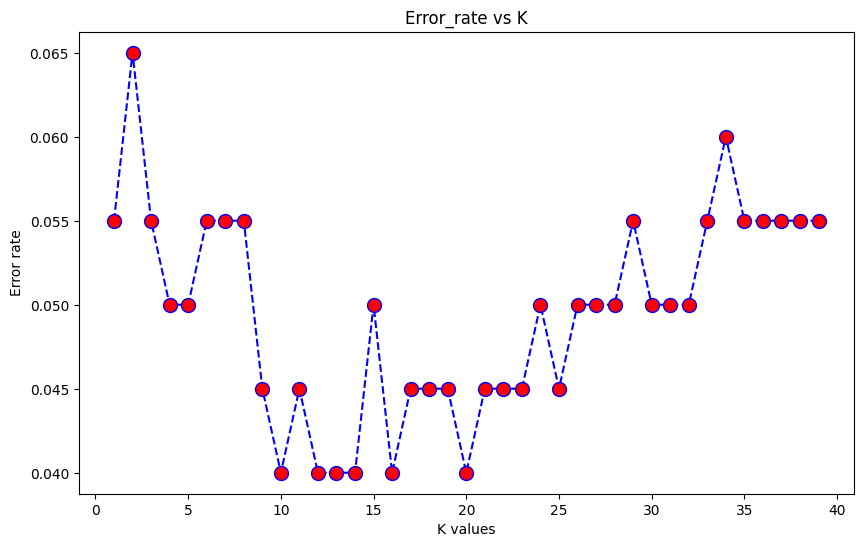

In [58]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.xlabel('K values')
plt.ylabel('Error rate')
plt.title('Error_rate vs K')

In [59]:
knn = KNeighborsClassifier(n_neighbors= 16)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        98
           1       0.97      0.95      0.96       102

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [61]:
print(confusion_matrix(y_test,y_pred))

[[95  3]
 [ 5 97]]


conclusion:By drawing the graph between err vs k. we can find the good value of k
    and we can imporve the model